In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

dataframe = pd.read_csv(r"avocado.csv")
dataframe.head()

print(dataframe.groupby('year').size())


year
2015    5615
2016    5616
2017    5722
2018    1296
dtype: int64


In [146]:
dataframe.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


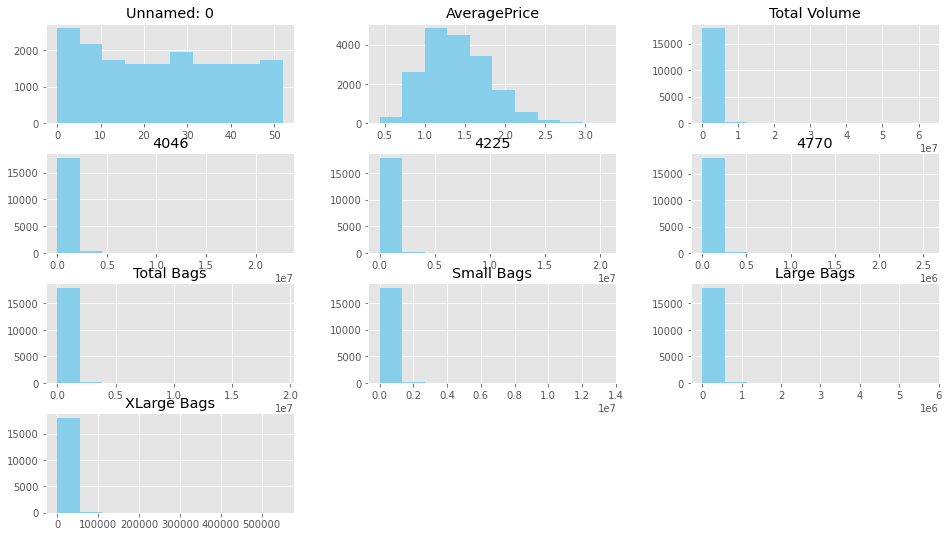

In [155]:
dataframe.drop(['year'],1).hist(color = "skyblue")
plt.show()

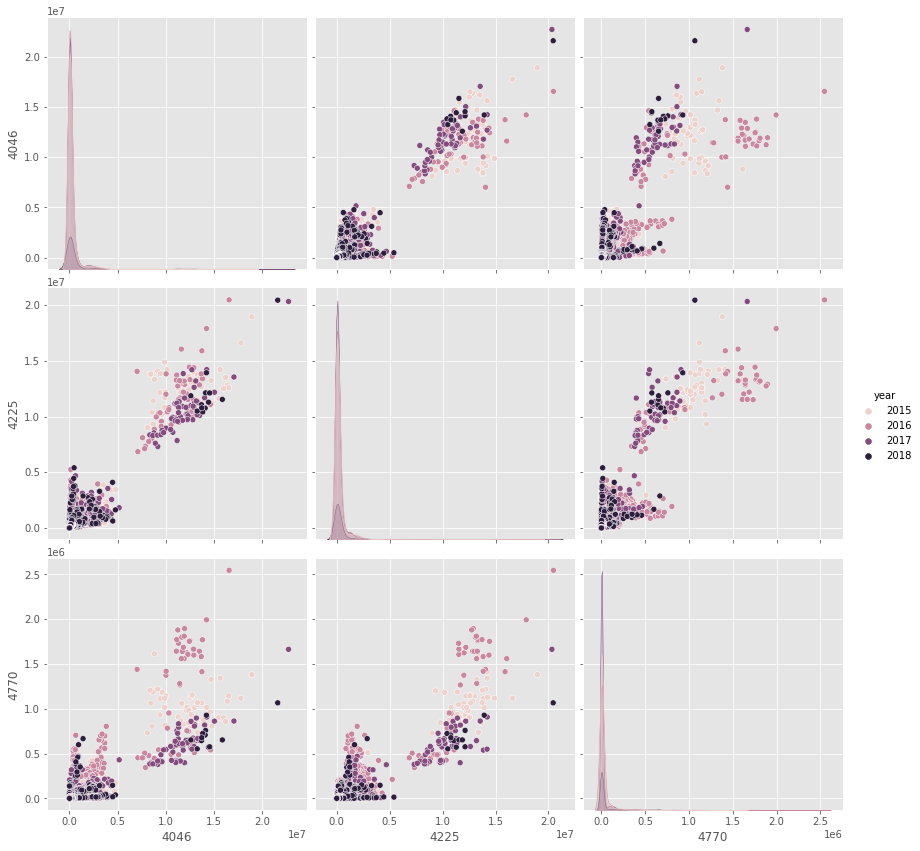

In [113]:

sb.pairplot(dataframe.dropna(), hue='year',height=4,vars=["4046","4225","4770"],kind='scatter')

In [114]:
X = np.array(dataframe[["4046","4225","4770"]])
y = np.array(dataframe['year'])
X.shape

(18249, 3)

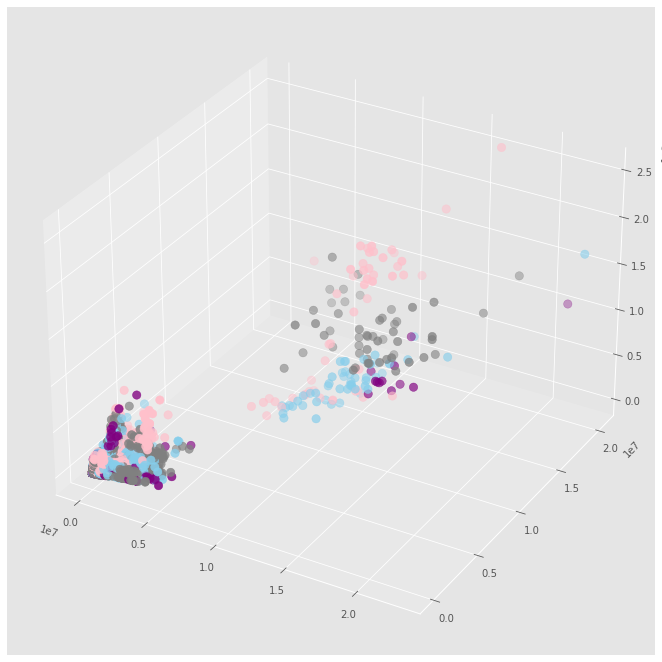

In [162]:

fig=plt.figure()
ax =Axes3D(fig)
colores=['gray','pink','skyblue','purple']
asignar=[]
for row in y:
   asignar.append(colores[row-2015])
ax.scatter(X[:, 0], X[:,1], X[:,2], c=asignar,s=70)

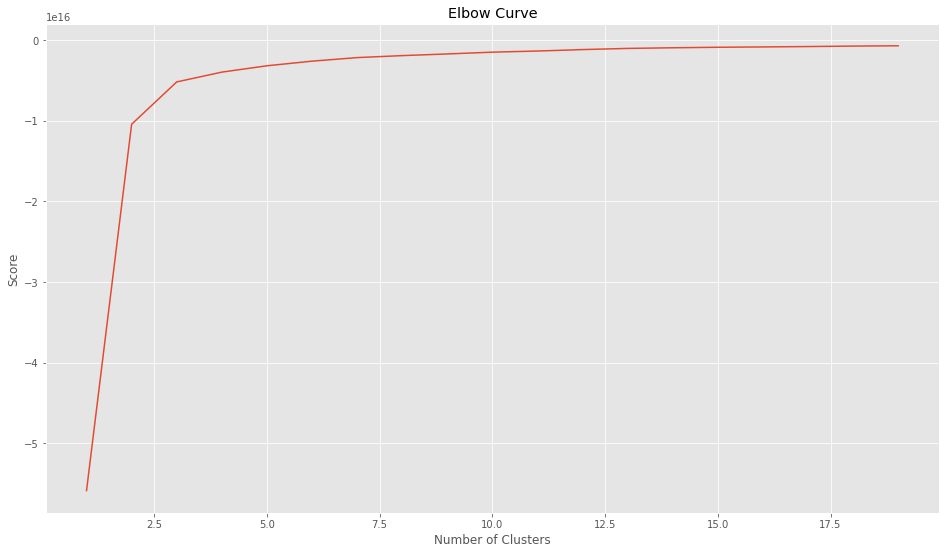

In [156]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [157]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[1.63760121e+06 1.52710525e+06 1.23365172e+05]
 [1.20109813e+07 1.16148609e+07 9.18703964e+05]
 [7.56611562e+04 9.01578466e+04 6.39149461e+03]]


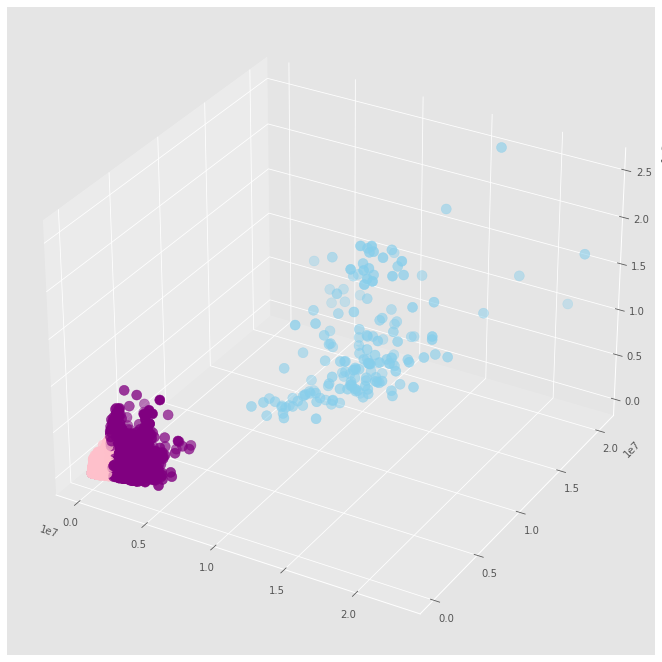

In [250]:
labels= kmeans.predict(X)
C = kmeans.cluster_centers_
colores=['purple','skyblue','pink']
col=['indigo','navy','hotpink']
asignar=[]
for row in  labels:
    asignar.append(colores[row])
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=100)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=100)

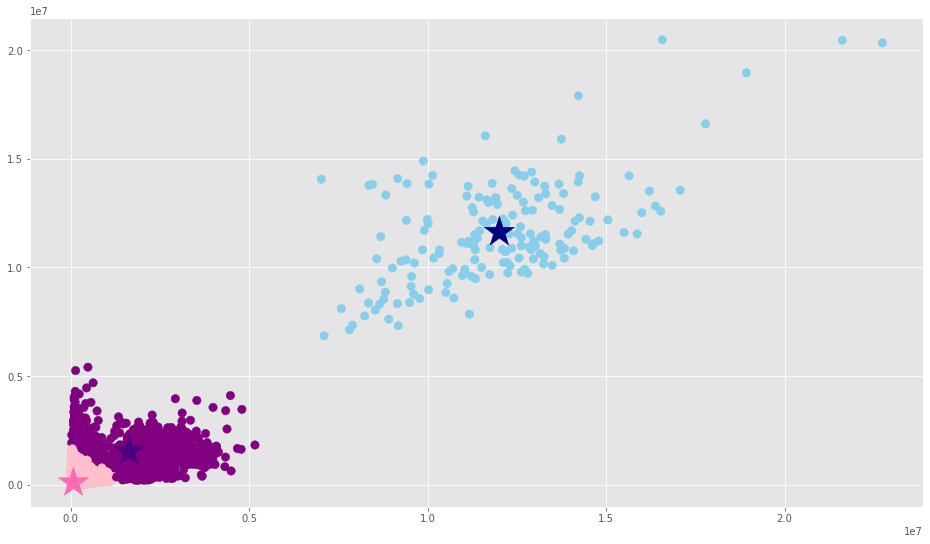

In [251]:
f1 = dataframe['4046'].values
f2 = dataframe['4225'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=col, s=1000)
plt.show()

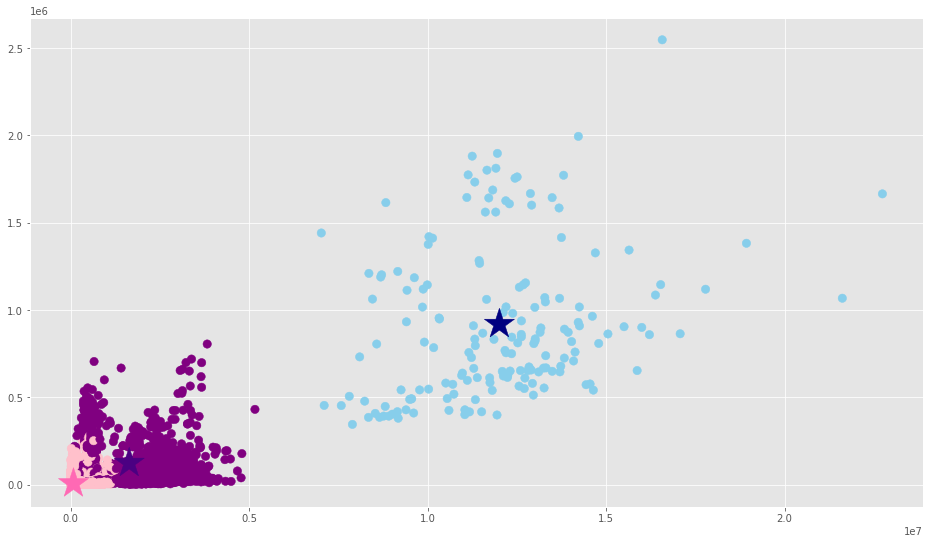

In [254]:
f1 = dataframe['4046'].values
f2 = dataframe['4770'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=col, s=1000)
plt.show()

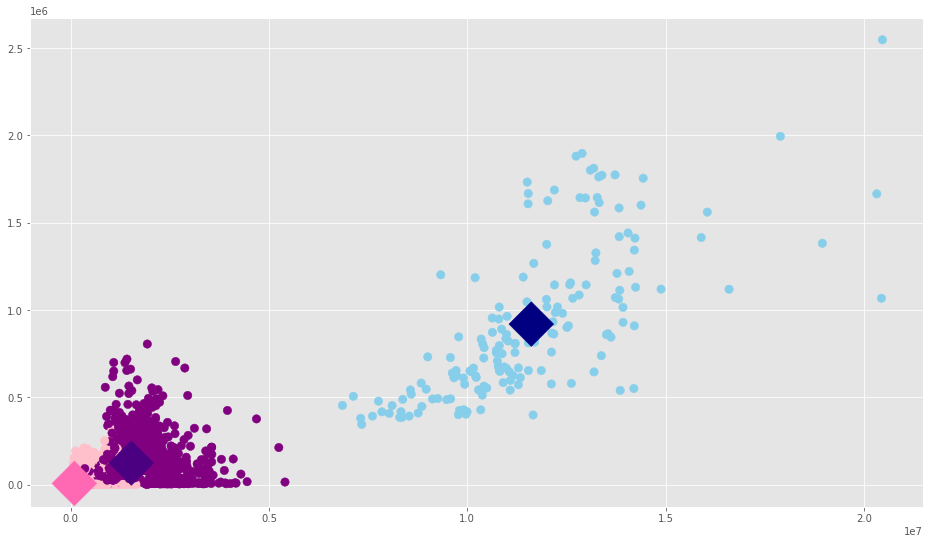

In [258]:

f1 = dataframe['4225'].values
f2 = dataframe['4770'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='D', c=col, s=1000)
plt.show()

In [221]:
copy =  pd.DataFrame()
copy['4046']=dataframe['4046'].values
copy['year']=dataframe['year'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('4046').size()
cantidadGrupo

,color,cantidad
0,purple,242
1,skyblue,8
2,pink,4


In [213]:
group_referrer_index = copy['4046'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['year']=[0,1,2,3]
diversidadGrupo['4046']=group_referrals.groupby('4046').size()
diversidadGrupo

,year,4046
0,0,242.0
1,1,NaN
2,2,NaN
3,3,NaN


In [149]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([8731, 2701, 5974], dtype=int64)

In [186]:
num=dataframe['4046'].values
for row in closest:
    print(num[row])

76056.35
11858139.34
1693588.76
